# Linguistic Style Matching Code -  POS Tags & Bigrams


In [1]:
import pandas as pd
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns 
import random
import itertools

from collections import Counter

# Below code in SCP_Code.py contains functions specific to linguistic alignment experiments
import SCP_Code as scp

import BigramCode as bi

In [2]:
## To run when parsing pos tag results
dataA = pd.read_csv('A_Tweets_Tagged.txt', sep='\t', header=None)
dataA.columns = ['Tokens', 'Tags', 'Conf','Raw Tweet']

dataB = pd.read_csv('B_Tweets_Tagged.txt', sep='\t', header=None)
dataB.columns = ['Tokens', 'Tags', 'Conf','Raw Tweet']

In [3]:
# Drop the final item in dataA because it has no corresponding reply message in dataB

dataA.drop(326167,axis = 0, inplace = True)
len(dataA)

326167

In [4]:
# Fill empty tags for error-free parsing through functions and calculations that 
# can't deal with nan values

dataA.fillna({'Tags':'B'}, inplace=True)
dataB.fillna({'Tags':'B'}, inplace=True)

In [30]:
# List of part of speech tags. Represent markers - like LIWC
markers = ['P','D','O','&','N','S','^','Z','L','V','A','R','!','T','X','Y','#','U','E','$',',','G']

In [11]:
def CalculateLSM(markers,TweetTagsA,TweetTagsB):
    allLSM = {}
    allTweets = len(TweetTagsA) # total number of tweets
    for mark in markers: 
        pA = (scp.countMarkers(mark,TweetTagsA)/allTweets)
        pB = (scp.countMarkers(mark,TweetTagsB)/allTweets)
        numerator = abs(pA-pB)
        denominator = pA + pB
        LSMScore = (1 - (numerator/denominator))
        allLSM[mark] = [pA,pB,LSMScore]
    return allLSM

In [32]:
## LSM = 1-(|p(A)-p(B)|/p(A)+p(B)) - probabilities that a used marker

LSMScores = CalculateLSM(markers,dataA.Tags,dataB.Tags)
LSMScores

{'P': [0.6967320421747142, 0.674516428700635, 0.9837989876044145],
 'D': [0.6390192754018647, 0.6161904791103944, 0.9818127637955292],
 'O': [0.6905572912035859, 0.6703467855423755, 0.9851492063205987],
 '&': [0.28065070960581545, 0.28526184439259644, 0.9918518598779946],
 'N': [0.8171826089089331, 0.7919930587705072, 0.9843463018709752],
 'S': [0.006183948713389153, 0.005687270631302369, 0.9581611570247933],
 '^': [0.32024699003884516, 0.28577691795920496, 0.94312093693876],
 'Z': [0.013744492851821307, 0.012321908715473975, 0.9454246059750646],
 'L': [0.27209987521729667, 0.2799670107644244, 0.9857496695656037],
 'V': [0.8712837288873492, 0.8486112942143135, 0.9868175473685898],
 'A': [0.6000300459580522, 0.5995762906731827, 0.9996217465088225],
 'R': [0.581870636821015, 0.5882170789810128, 0.9945760970957227],
 '!': [0.24619596709661, 0.28532316267433555, 0.9263861009206064],
 'T': [0.07401423197319165, 0.07344397195301794, 0.9961327345309381],
 'X': [0.020149187379471252, 0.0197138

In [33]:
LSMdf = pd.DataFrame.from_dict(LSMScores,orient = 'index')
LSMdf.columns = ['pA', 'pB','LSM Score']
LSMdf

,pA,pB,LSM Score
P,0.696732,0.674516,0.983799
D,0.639019,0.616190,0.981813
O,0.690557,0.670347,0.985149
&,0.280651,0.285262,0.991852
N,0.817183,0.791993,0.984346
S,0.006184,0.005687,0.958161
^,0.320247,0.285777,0.943121
Z,0.013744,0.012322,0.945425
L,0.272100,0.279967,0.985750
V,0.871284,0.848611,0.986818


In [41]:
# Write dataframe to latex
with open ('LSMTable.tex','w') as tf:
    tf.write(LSMdf.to_latex())

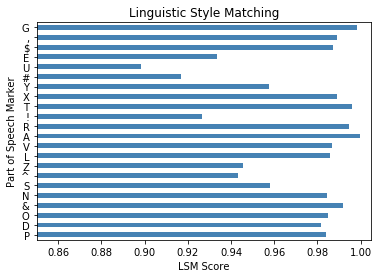

In [42]:
# Visualize dataframe to horizontal bar chart
plot1 = LSMdf['LSM Score'].plot(kind = 'barh',legend = False, color = 'steelblue')#,figsize = (20,10))
                    
#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('LSM Score')
plt.xlim(0.85,1.005)
plt.ylabel('Part of Speech Marker')
plt.title('Linguistic Style Matching')
plt.savefig('LSM_POS_Tags_GlobalAlignment_steel')

# Bigrams

In [5]:
bigramsA = bi.AllBigramsinTweetset(dataA.Tags)
bigramsB = bi.AllBigramsinTweetset(dataB.Tags)

tupleBigramsA = bi.convertToTuples(bigramsA)
tupleBigramsB = bi.convertToTuples(bigramsB)

In [6]:
# Get top bigrams to use as markers:
singleListBigramsA = [y for x in tupleBigramsA for y in x]
singleListBigramsB = [y for x in tupleBigramsB for y in x]

print(len(singleListBigramsA),len(singleListBigramsB))
      
bigramsFreqA = Counter(singleListBigramsA)
bigramsFreqB = Counter(singleListBigramsB)

# Set the topBigrams to use as markers
totalBigramFreq = bigramsFreqB+bigramsFreqA
topBigrams = totalBigramFreq.most_common(50)

topBigramsOnly = [item[0] for item in topBigrams] # take bigram and not the count
topBigramsOnly[0]

3863782 3815722


('O', 'V')

In [12]:
LSMScoresBi = CalculateLSM(topBigramsOnly,tupleBigramsA,tupleBigramsB)

In [13]:
LSMdf = pd.DataFrame.from_dict(LSMScoresBi,orient = 'index')
LSMdf.columns = ['pA', 'pB','LSM Score']

# Write dataframe to latex
with open ('LSMTable_Bigrams.tex','w') as tf:
    tf.write(LSMdf.to_latex())

LSMdf.head()

,pA,pB,LSM Score
"(O, V)",0.528211,0.513556,0.985932
"(N, ,)",0.517848,0.493290,0.975713
"(D, N)",0.474383,0.459001,0.983521
"(V, O)",0.358571,0.326685,0.953469
"(N, P)",0.346301,0.334255,0.982300


In [14]:
LSMdfToPlot = LSMdf.copy()
LSMdfToPlot.drop(['pA'],axis = 1, inplace = True)
LSMdfToPlot.drop(['pB'],axis = 1, inplace = True)

In [17]:
LSMLargest = LSMdfToPlot.nlargest(20,'LSM Score')
LSMLargest

,LSM Score
"(P, V)",0.999525
"(V, ,)",0.999013
"(P, A)",0.998697
"(&, V)",0.998346
"(P, O)",0.998148
"(,, R)",0.997028
"(P, N)",0.996559
"(N, &)",0.995836
"(O, R)",0.994756
"(,, A)",0.994590


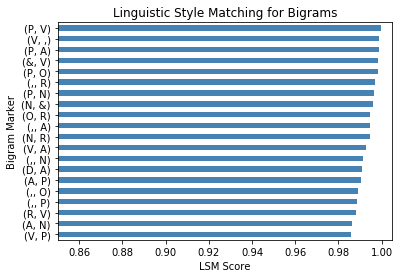

In [18]:
# Visualize dataframe to horizontal bar chart
plot3 = LSMLargest.sort_values('LSM Score').plot(kind = 'barh',legend = False, color = 'steelblue')#,figsize = (15,10))
                    
#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('LSM Score')
plt.xlim(0.85,1.005)
plt.ylabel('Bigram Marker')
plt.title('Linguistic Style Matching for Bigrams')
plt.savefig('LSM_Largest')